<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/Writ_spl_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [126]:
#link google colab and google drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [132]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/writ_sampl.csv"
data = pd.read_csv(file_path)
data

,№,Возраст,Пол,Интернет ответ,Интернет время,Time-test: Среднее 1 1,"Time-test: Среднее время реакции, серия 1 (Часть 2)","Time-test: Среднее время реакции, серия 2 (Часть 1)","Time-test: Среднее время реакции, серия 2 (Часть 2)",Time-test: Проп 1 1,...,WMem: Время серии 3,Время 1,Время 2,Время 3,Время фиксации на области интереса (тексте),Длительность первой фиксации на области интереса,Среднее время фиксации,Все фиксации,Амплитуда саккады,Количество саккад
0,63,15,1,1,182,341.2,300.4,434.3,492.7,0,...,31284,5326.000000,4408.857143,4469.142857,8.346596,0.367599,0.439295,19,8.624043,18
1,54,11,0,1,118,343.3,322.4,392.0,416.9,1,...,36989,6579.095238,5890.583333,5284.142857,16.781460,0.615524,0.762794,22,8.681620,20
2,17,13,1,1,298,275.3,279.6,360.2,345.7,1,...,61632,6902.466667,6300.076923,6163.200000,6.289856,0.343597,0.251594,25,5.778367,24
3,57,12,0,0,56,304.6,313.2,437.4,423.3,2,...,17716,4915.954545,4423.333333,4429.000000,13.191900,0.899536,0.507381,26,6.292604,23
4,53,12,0,0,52,319.5,288.1,340.5,405.8,1,...,18581,3669.000000,6115.277778,3716.200000,9.284821,0.581558,0.343882,27,5.897567,22
5,51,11,0,0,552,254.8,280.5,395.0,350.1,3,...,18861,4288.000000,5104.500000,4715.250000,19.902344,1.550644,0.710798,28,10.093942,27
6,60,13,1,1,501,267.4,250.5,319.6,335.8,1,...,93407,4552.222222,5188.500000,6671.928571,5.271957,0.180954,0.159756,33,5.816387,19
7,25,16,1,1,61,282.6,336.0,394.0,418.2,1,...,45979,3216.214286,1976.200000,5108.777778,9.506622,0.330429,0.288079,33,7.225397,32
8,56,12,0,0,55,295.4,310.3,388.8,399.6,2,...,160699,8743.000000,7349.857143,8457.842105,26.452972,0.049255,0.755799,35,7.600752,32
9,26,16,1,1,112,291.2,314.4,392.4,392.4,0,...,45979,3752.250000,3952.400000,4179.909091,9.977242,0.278290,0.255827,39,6.825592,38


In [55]:
data.keys()

Index(['№', 'Возраст', 'Пол', 'Интернет ответ', 'Интернет время',
       'Time-test: Среднее 1 1',
       'Time-test: Среднее время реакции, серия 1 (Часть 2)',
       'Time-test: Среднее время реакции, серия 2 (Часть 1)',
       'Time-test: Среднее время реакции, серия 2 (Часть 2)',
       'Time-test: Проп 1 1',
       'Time-test: Количество пропусков, серия 1 (Часть 2)',
       'Time-test: Количество пропусков, серия 2 (Часть 1)',
       'Time-test: Количество пропусков, серия 2 (Часть 2)',
       'Time-test: Ош 2 1', 'Time-test: Количество ошибок, серия 2 (Часть 2) ',
       'WMem: Количество объектов, серия 1',
       'WMem: Количество объектов, серия 2',
       'WMem: Количество объектов, серия 3', 'WMem: Время серии 1',
       'WMem: Время серии 2', 'WMem: Время серии 3', 'Время 1', 'Время 2',
       'Время 3', 'Время фиксации на области интереса (тексте)',
       'Длительность первой фиксации на области интереса',
       'Среднее время фиксации', 'Все фиксации', 'Амплитуда сакка

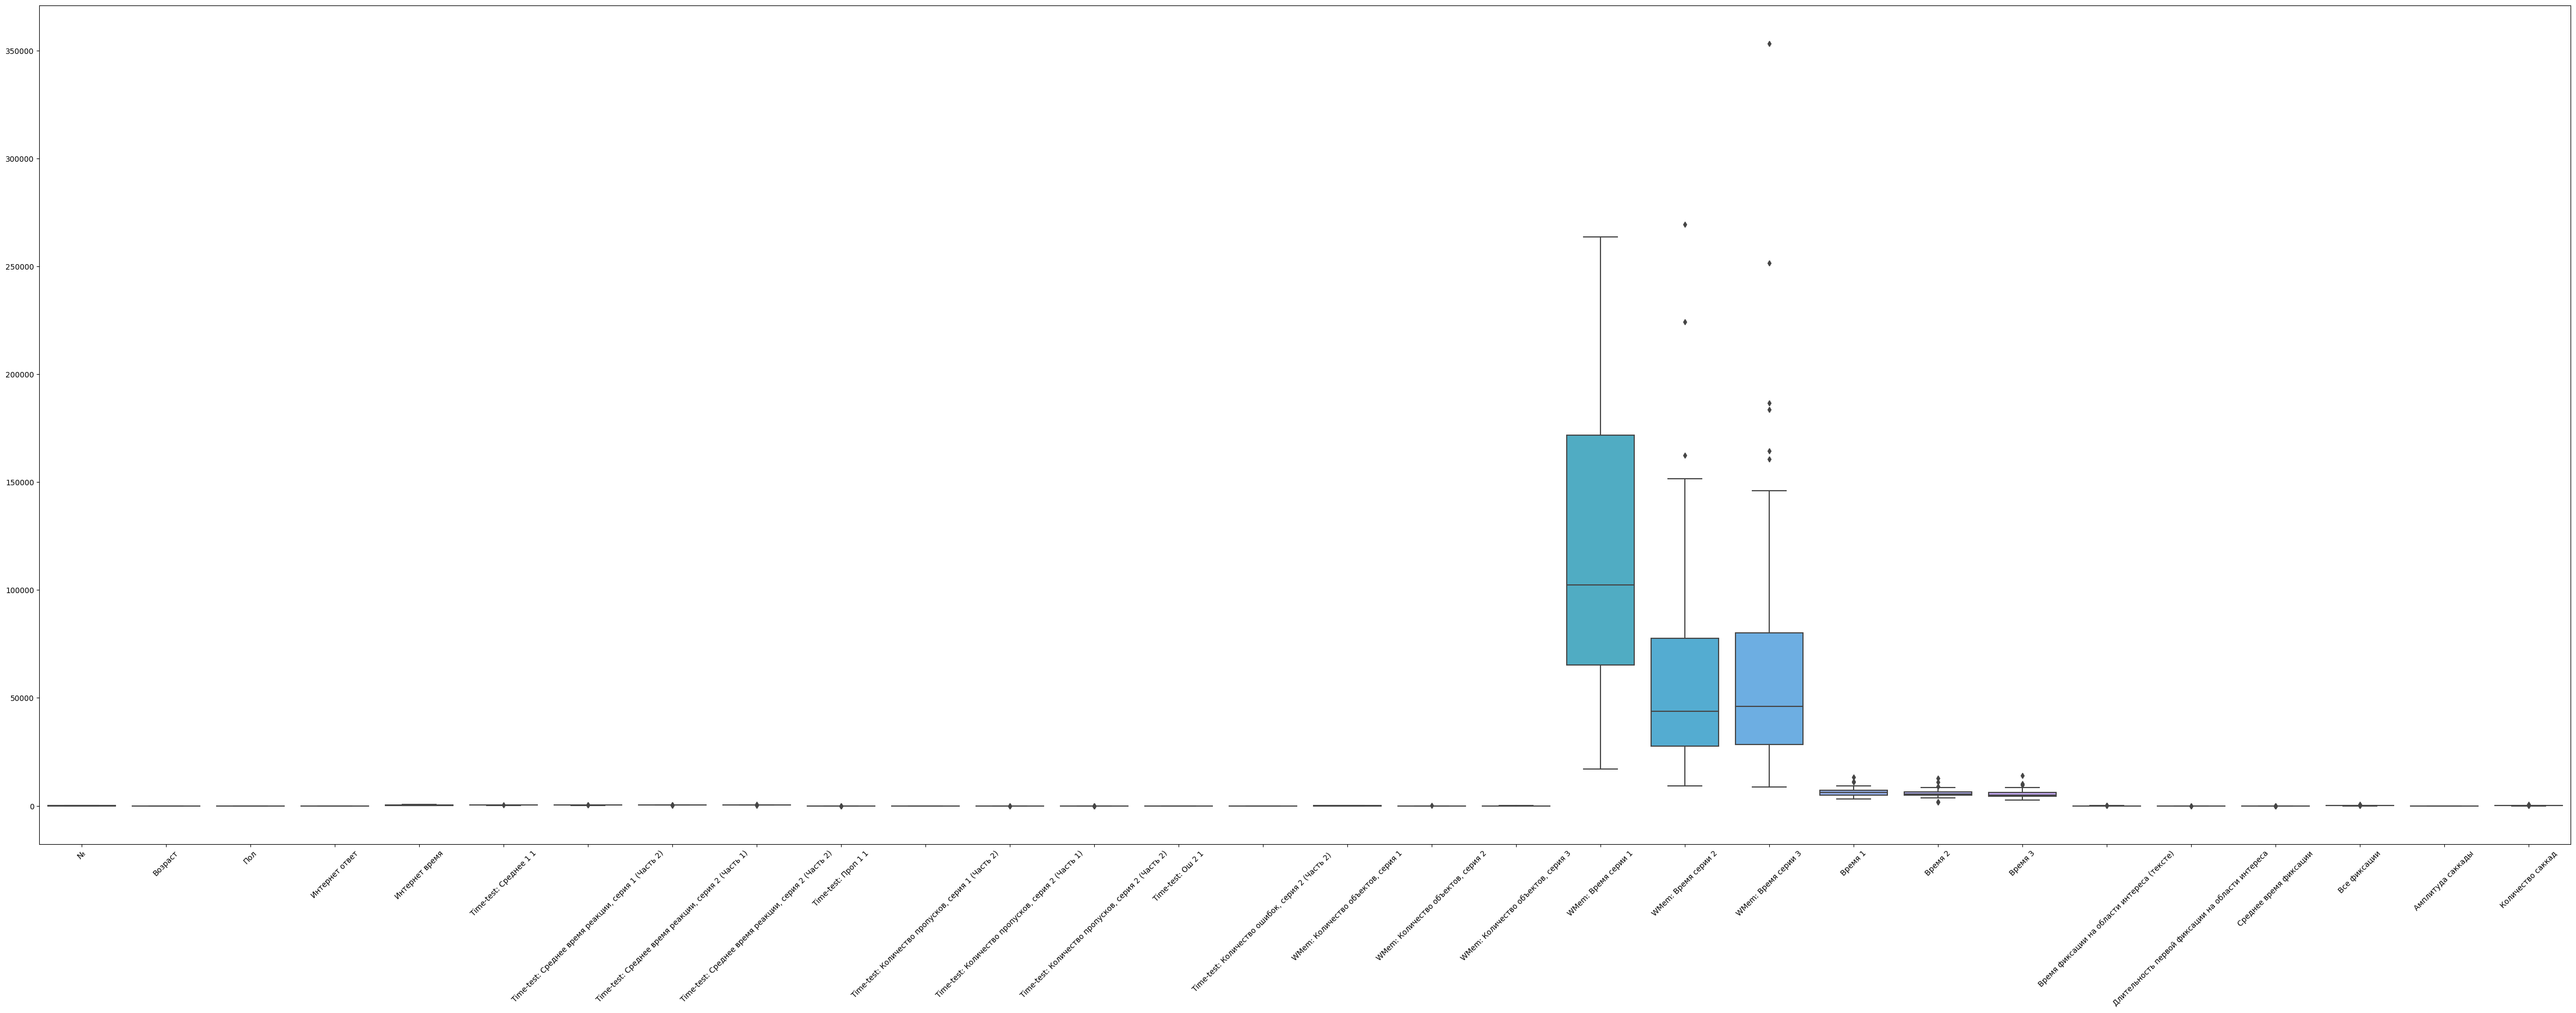

In [34]:
fig,ax = plt.subplots(1,figsize=(60, 20))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

In [52]:
import pandas as pd

# Create an empty DataFrame to store the outliers
outliers_df = pd.DataFrame(columns=['Variable', 'Outlier Values'])

# Calculate and store the outliers for each variable
for column in data.columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    if not outliers.empty:
        outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)

# Display the table with outliers
print("Outliers Table:")
display(HTML(outliers_df.to_html()))


Outliers Table:


<ipython-input-52-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-52-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-52-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-52-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

,Variable,Outlier Values
0,"Time-test: Среднее время реакции, серия 1 (Часть 2)",[386.9]
1,"Time-test: Среднее время реакции, серия 2 (Часть 1)","[465.5, 450.4]"
2,"Time-test: Среднее время реакции, серия 2 (Часть 2)","[492.7, 491.7]"
3,Time-test: Проп 1 1,"[7, 6, 8, 7]"
4,"Time-test: Количество пропусков, серия 2 (Часть 1)","[10, 10, 9]"
5,"Time-test: Количество пропусков, серия 2 (Часть 2)","[15, 8, 9]"
6,WMem: Время серии 2,[162343]
7,WMem: Время серии 3,"[186743, 160699, 183638, 164476]"
8,Время 1,[13185.95]
9,Время 2,"[1699.333333, 1976.2, 10956.75, 8551.333333, 8909.058824]"


In [ ]:
import pandas as pd

# Create an empty dictionary to store the count of outliers for each variable
outlier_counts = {}

# Calculate and store the count of outliers for each variable
for column in data.columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    outlier_counts[column] = len(outliers)

# Create a DataFrame with variable names and outlier counts
outliers_df = pd.DataFrame(list(outlier_counts.items()), columns=['Variable', 'Outlier Count'])

# Sort the DataFrame by outlier count in descending order
outliers_df = outliers_df.sort_values(by='Outlier Count', ascending=False)

# Display the sorted table
print("Variables with Outlier Counts (Sorted):")
display(outliers_df)


TypeError: ignored

In [19]:
! pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 32.2 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=2f49c61779392be095d025391a60d0f6af9e163fe7c87d5a72ae3e5ac867abfe
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


Total 20.21% Cumulative Variance explained by the 1 factors
Total 36.75% Cumulative Variance explained by the 2 factors
Total 48.88% Cumulative Variance explained by the 3 factors
Total 58.27% Cumulative Variance explained by the 4 factors
Total 65.14% Cumulative Variance explained by the 5 factors
Total 72.83% Cumulative Variance explained by the 6 factors
Total 75.33% Cumulative Variance explained by the 7 factors
Total 78.10% Cumulative Variance explained by the 8 factors
Total 79.38% Cumulative Variance explained by the 9 factors
Total 77.83% Cumulative Variance explained by the 10 factors
Total 80.43% Cumulative Variance explained by the 11 factors
Total 79.62% Cumulative Variance explained by the 12 factors
Total 79.57% Cumulative Variance explained by the 13 factors
Factor Loadings Table:


,Factor 1,Factor 2,Factor 3,Factor 4
Возраст,-0.496774,-0.330810,0.034976,-0.046476
Интернет ответ,-0.345226,-0.107616,0.058832,-0.182871
Интернет время,-0.016399,0.202828,-0.322020,0.219432
Time-test: Среднее 1 1,0.620053,-0.067493,0.043472,0.024945
"Time-test: Среднее время реакции, серия 1 (Часть 2)",0.678591,0.067200,0.273266,-0.082029
"Time-test: Среднее время реакции, серия 2 (Часть 1)",0.795981,-0.487314,-0.000759,0.006288
"Time-test: Среднее время реакции, серия 2 (Часть 2)",0.689057,-0.426292,-0.003117,-0.009215
Time-test: Ош 2 1,-0.034301,0.802870,-0.048326,-0.046555
"Time-test: Количество ошибок, серия 2 (Часть 2)",0.044536,0.920678,0.167961,0.018533
"WMem: Количество объектов, серия 1",0.038075,-0.044666,0.959773,0.061105


Bartlett’s Test:
Chi-Square Value: 294.85800716160134
P-value: 6.139529638152126e-27

Kaiser-Meyer-Olkin (KMO) Test:
KMO Overall: [0.61403087 0.49510518 0.55301411 0.78777003 0.58851466 0.73209475
 0.63409172 0.6058259  0.50838861 0.53149428 0.47868505 0.5307401
 0.432751  ]
KMO Model: 0.5794853011653331


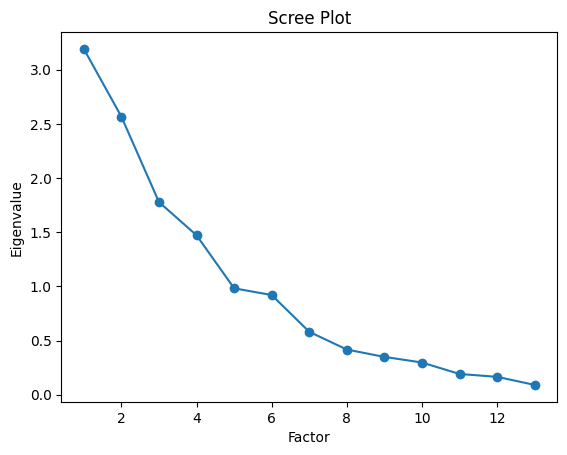

Descriptive Statistics:


,Возраст,Интернет ответ,Интернет время,Time-test: Среднее 1 1,"Time-test: Среднее время реакции, серия 1 (Часть 2)","Time-test: Среднее время реакции, серия 2 (Часть 1)","Time-test: Среднее время реакции, серия 2 (Часть 2)",Time-test: Ош 2 1,"Time-test: Количество ошибок, серия 2 (Часть 2)","WMem: Количество объектов, серия 1",WMem: Время серии 1,Все фиксации,Амплитуда саккады
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,13.372549,0.392157,203.980392,300.241176,303.813725,382.225490,393.700000,9.313725,8.470588,16.823529,111544.607843,73.078431,5.265746
std,2.144395,0.493089,168.754791,27.678065,28.443931,31.246919,41.526681,3.921684,4.428783,6.710308,60923.535099,40.543726,1.845311
min,9.000000,0.000000,30.000000,254.800000,238.400000,319.600000,326.200000,2.000000,1.000000,4.000000,17152.000000,19.000000,2.314006
25%,11.500000,0.000000,59.000000,278.000000,285.800000,360.550000,360.200000,6.500000,5.500000,12.500000,70369.000000,43.500000,3.771148
50%,14.000000,0.000000,162.000000,292.900000,300.400000,384.400000,393.800000,9.000000,8.000000,17.000000,103480.000000,59.000000,4.871253
75%,15.000000,1.000000,297.500000,314.350000,321.100000,395.300000,417.550000,11.000000,10.500000,22.000000,158726.500000,95.500000,6.622784
max,17.000000,1.000000,552.000000,366.900000,386.900000,465.500000,492.700000,19.000000,19.000000,28.000000,263719.000000,173.000000,10.093942
Skewness,-0.203941,0.455272,0.885478,0.650838,0.276705,0.565332,0.557238,0.401279,0.444801,-0.201636,0.455515,0.950856,0.536155
Kurtosis,-0.991309,-1.867594,-0.531489,-0.412404,0.699627,0.250981,-0.110622,-0.112308,-0.447082,-0.919614,-0.553959,0.338438,-0.373633


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from IPython.display import display, HTML

# Assume you have loaded your data into the 'data' DataFrame


#Specify the variables you want to include in the factor analysis
selected_variables = [
       'Возраст',
       #'Пол',
       'Интернет ответ',
       'Интернет время',
       'Time-test: Среднее 1 1',
       "Time-test: Среднее время реакции, серия 1 (Часть 2)",
       "Time-test: Среднее время реакции, серия 2 (Часть 1)",
       "Time-test: Среднее время реакции, серия 2 (Часть 2)",
       #'Time-test: Проп 1 1',
       #"Time-test: Количество пропусков, серия 1 (Часть 2)",
       #"Time-test: Количество пропусков, серия 2 (Часть 1)",
       #"Time-test: Количество пропусков, серия 2 (Часть 2)",
       'Time-test: Ош 2 1',
       "Time-test: Количество ошибок, серия 2 (Часть 2) ",
       "WMem: Количество объектов, серия 1",
       #"WMem: Количество объектов, серия 2",
       #"WMem: Количество объектов, серия 3",
       'WMem: Время серии 1',
       #'WMem: Время серии 2',
       #'WMem: Время серии 3',
       #'Время 1',
       #'Время 2',
       #'Время 3',
       #'Время фиксации на области интереса (тексте)',
       #'Длительность первой фиксации на области интереса',
       #'Среднее время фиксации',
       'Все фиксации',
       'Амплитуда саккады',
       #'Количество саккад',
]  # Replace with the actual variable names you want to include


selected_data = data[selected_variables]

# Create a new DataFrame with only the selected variables
#selected_data = data[selected_variables]

# Specify the number of factors you want to extract
num_factors = 4

# Calculate the cumulative variance explained by factors
cumulative_variance_explained = []
for i in range(1, len(selected_variables) + 1):
    factor_analyzer = FactorAnalyzer(rotation='geomin_obl', method='uls', n_factors=i)
    factor_analyzer.fit(selected_data)
    fa_var = factor_analyzer.get_factor_variance()
    total_cum_variance = fa_var[-1][-1]  # Access the last element of the array
    cumulative_variance_explained.append(total_cum_variance)

# Print the cumulative variance explained by factors
for i, variance_explained in enumerate(cumulative_variance_explained):
    print(f"Total {variance_explained * 100:.2f}% Cumulative Variance explained by the {i + 1} factors")

# Initialize the factor analyzer with the desired number of factors
factor_analyzer = FactorAnalyzer(rotation='geomin_obl', n_factors=num_factors, method='uls')

# Fit the model to your selected data
factor_analyzer.fit(selected_data)

# Get the factor loadings
factor_loadings = factor_analyzer.loadings_

# Create a pandas DataFrame from the factor loadings
factor_loading_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(num_factors)], index=selected_data.columns)

# Print the factor loadings table with grid lines using HTML
print("Factor Loadings Table:")
display(HTML(factor_loading_df.to_html()))

# Bartlett’s Test
chi_square_value, p_value = calculate_bartlett_sphericity(selected_data)
print("Bartlett’s Test:")
print("Chi-Square Value:", chi_square_value)
print("P-value:", p_value)

# Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(selected_data)
print("\nKaiser-Meyer-Olkin (KMO) Test:")
print("KMO Overall:", kmo_all)
print("KMO Model:", kmo_model)

# Scree Plot
ev, v = factor_analyzer.get_eigenvalues()
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()


# Calculate basic descriptive statistics for the selected data
descriptive_stats = selected_data.describe()

# Calculate skewness for each variable
skewness = selected_data.skew()

# Calculate kurtosis for each variable
kurtosis_value = selected_data.kurtosis()

# Add skewness and kurtosis to the descriptive statistics DataFrame
descriptive_stats.loc['Skewness'] = skewness
descriptive_stats.loc['Kurtosis'] = kurtosis_value

# Print the descriptive statistics
print("Descriptive Statistics:")
display(HTML(descriptive_stats.to_html()))

In [122]:
# Calculate Communalities from factor analysis results
communalities = factor_analyzer.get_communalities()
communalities_df = pd.DataFrame(communalities, columns=["Communalities"], index=selected_data.columns)

# Print the Communalities table with grid lines using HTML
print("Communalities Table:")
display(HTML(communalities_df.to_html()))

Communalities Table:


,Communalities
Возраст,0.355603
Интернет ответ,0.136175
Интернет время,0.225878
Time-test: Среднее 1 1,0.401548
"Time-test: Среднее время реакции, серия 1 (Часть 2)",0.556966
"Time-test: Среднее время реакции, серия 2 (Часть 1)",0.891911
"Time-test: Среднее время реакции, серия 2 (Часть 2)",0.678718
Time-test: Ош 2 1,0.640722
"Time-test: Количество ошибок, серия 2 (Часть 2)",0.868903
"WMem: Количество объектов, серия 1",0.959590


In [43]:
import numpy as np

# Define a function to calculate Cronbach's Alpha
def cronbach_alpha(items):
    num_items = items.shape[1]

    # Calculate the covariance matrix
    cov_matrix = np.cov(items, rowvar=False)

    # Calculate the mean for each item
    item_means = np.mean(items, axis=0)

    # Calculate the overall variance of the scale
    scale_variance = np.var(items)

    # Calculate Cronbach's Alpha
    alpha = (num_items / (num_items - 1)) * (1 - (scale_variance / cov_matrix.sum()))

    return alpha

# Calculate Cronbach's Alpha for all selected variables
cronbach_alpha_value = cronbach_alpha(selected_data.to_numpy())

# Print the Cronbach's Alpha value for all selected variables
print("Cronbach's Alpha for Selected Variables (as a scale):", cronbach_alpha_value)

Cronbach's Alpha for Selected Variables (as a scale): 0.9575298161193287


In [23]:
import numpy as np
import pandas as pd

# Define a function to calculate Cronbach's Alpha
def cronbach_alpha(items):
    num_items = items.shape[1]

    # Calculate the covariance matrix
    cov_matrix = np.cov(items, rowvar=False)

    # Calculate the mean for each item
    item_means = np.mean(items, axis=0)

    # Calculate the overall variance of the scale
    scale_variance = np.var(items)

    # Calculate Cronbach's Alpha
    alpha = (num_items / (num_items - 1)) * (1 - (scale_variance / cov_matrix.sum()))

    return alpha

# Initialize a dictionary to store results
alpha_values = {}

# Calculate Cronbach's Alpha for all selected variables
cronbach_alpha_all = cronbach_alpha(selected_data.to_numpy())

# Iterate over each variable, temporarily removing it and calculating Cronbach's Alpha
for column in selected_data.columns:
    # Create a copy of the data with the current variable removed
    data_without_variable = selected_data.drop(columns=[column]).to_numpy()

    # Calculate Cronbach's Alpha without the current variable
    cronbach_alpha_without_variable = cronbach_alpha(data_without_variable)

    # Store the result in the dictionary
    alpha_values[column] = cronbach_alpha_without_variable

# Create a DataFrame to display the Cronbach's Alpha values if each item is deleted
alpha_table = pd.DataFrame.from_dict(alpha_values, orient='index', columns=['Cronbach Alpha if Item Deleted'])

# Print the table
print("Cronbach's Alpha if Item Deleted:")
display(alpha_table)

Cronbach's Alpha if Item Deleted:


,Cronbach Alpha if Item Deleted
Возраст,0.957709
Пол,0.957710
Интернет ответ,0.957710
Интернет время,0.957718
Time-test: Среднее 1 1,0.957693
"Time-test: Среднее время реакции, серия 1 (Часть 2)",0.957693
"Time-test: Среднее время реакции, серия 2 (Часть 1)",0.957696
"Time-test: Среднее время реакции, серия 2 (Часть 2)",0.957694
Time-test: Проп 1 1,0.957710
"Time-test: Количество пропусков, серия 1 (Часть 2)",0.957710
